In [1]:
import sys
sys.path.append("../utils")
import xarray as xr
import numpy as np
import os
from tiff_io import readTiff
from imgShow import imgShow
import matplotlib.pyplot as plt
from fp_water import fp_mask, fp_wat_cal, fp_show,get_fp_angle
from s3l2_subset import s3l2_subset
from coor_convert import geo2imagexy
from osgeo import gdal


In [2]:
root_dir = os.path.dirname(os.getcwd())
path_s3l2 = root_dir+'/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20190121T021825_20190121T030242_20191218T104655_2657_040_260______MR1_R_NT_004.SEN3/enhanced_measurement_subs_preproc_mainproc.nc'
path_tgauge = root_dir+'/test_data/tgauge_data/hk_tide_gauge.nc'
path_rsimg = root_dir+'/test_data/rs_image/greatbay_l8_img.tif'
path_rsimg_wat = root_dir+'/test_data/rs_image/greatbay_l8_img_wat_sel.tif'


In [3]:
l8_img, im_geotrans, im_proj, im_row, im_col, im_bands = readTiff(path_rsimg)
l8_img_wat,_,_,_,_,_ = readTiff(path_rsimg_wat)
img_gdal = gdal.Open(path_rsimg)
s3_l2 = xr.open_dataset(path_s3l2)
col_fps, row_fps = geo2imagexy(lon=s3_l2['lon_20_ku'], lat=s3_l2['lat_20_ku'],img_gdal=img_gdal)
tgauge_data = xr.open_dataset(path_tgauge)


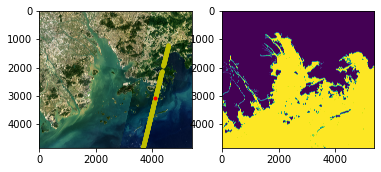

In [5]:
plt.subplot(121)
imgShow(l8_img)
plt.plot(col_fps, row_fps, 'y.')
plt.plot(col_fps[160], row_fps[160], 'r.')
plt.subplot(122)
plt.imshow(l8_img_wat)


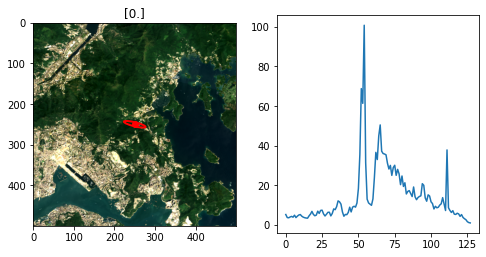

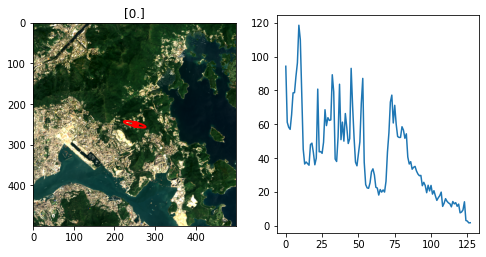

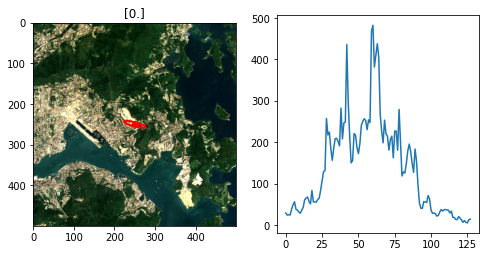

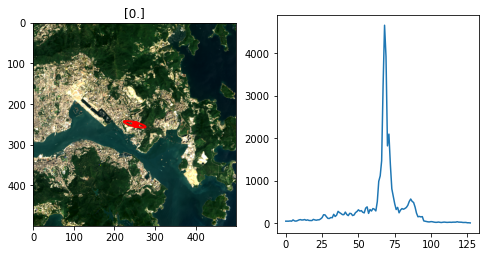

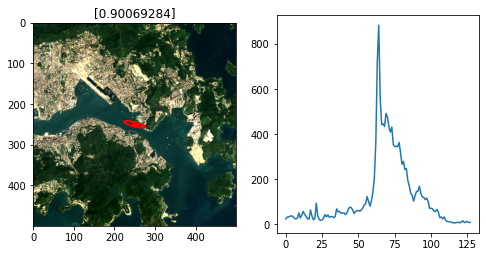

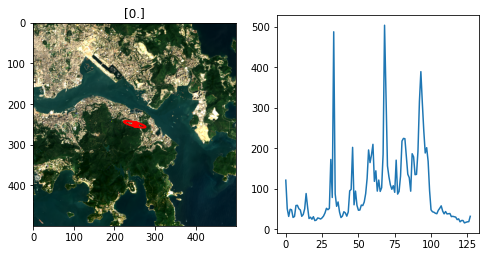

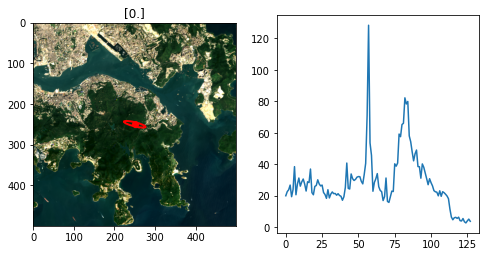

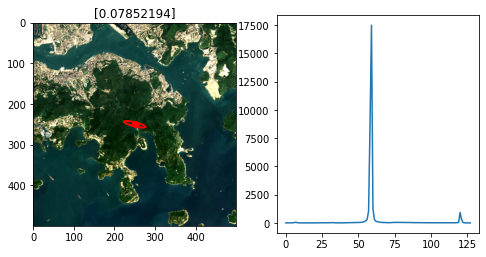

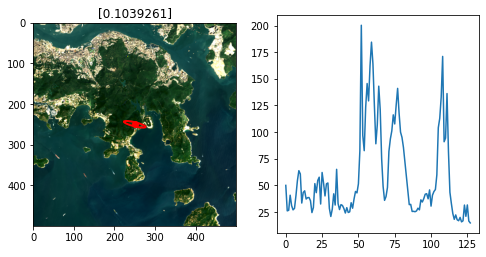

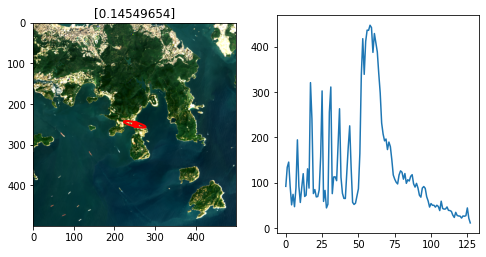

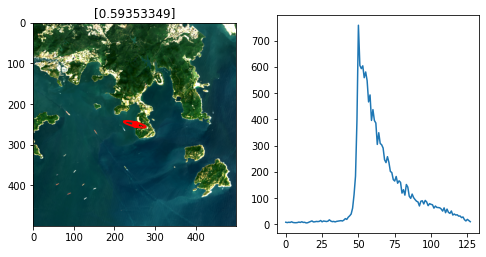

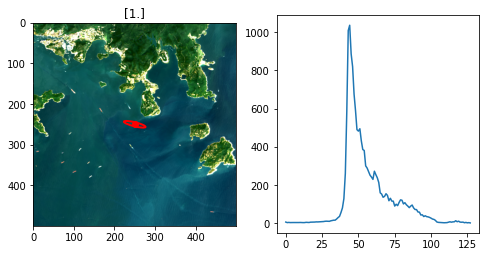

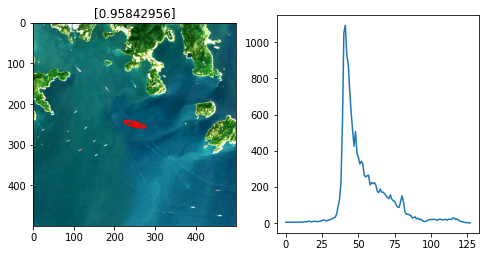

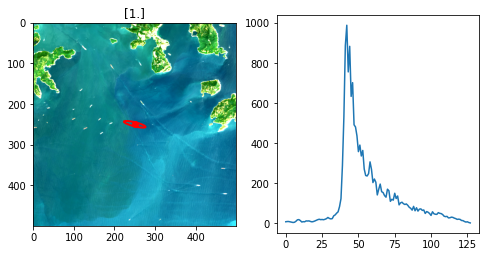

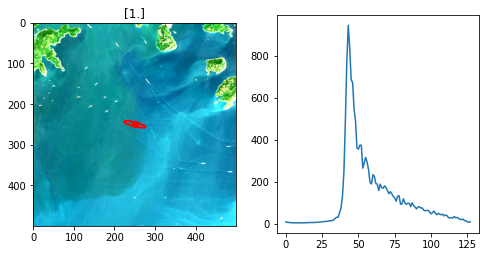

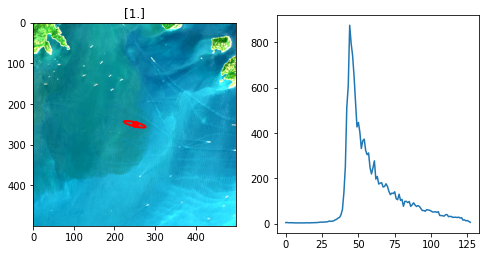

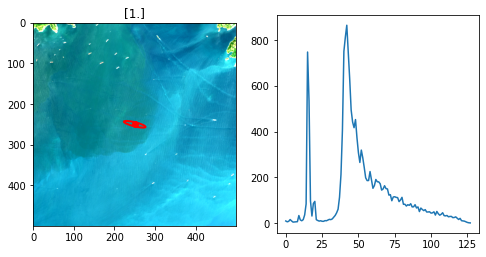

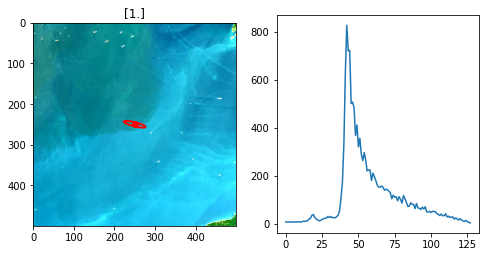

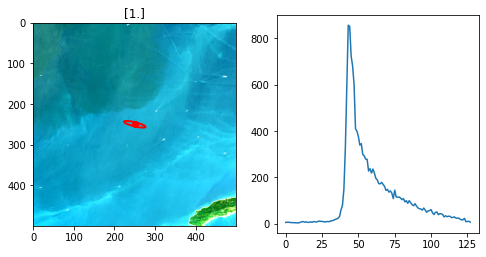

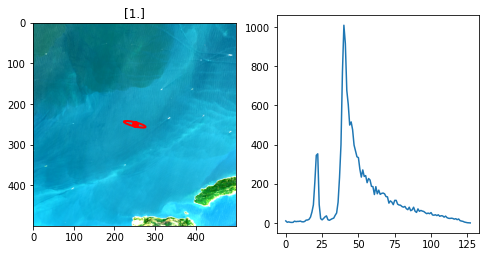

In [10]:
ind = 160
vis_window = 500
radius = int(vis_window/2)
angle_e = get_fp_angle(row_fps=row_fps,col_fps=col_fps)

for ind in range(100,200,5):
    plt.figure(figsize=(8,4))
    ls8_subs = l8_img[row_fps[ind]-radius:row_fps[ind]+radius, col_fps[ind]-radius:col_fps[ind]+radius, :]
    plt.subplot(1,2,1)
    fp_show(img=ls8_subs, a=27.3, b=5, center_row=radius, center_col=radius, angle=angle_e)
    wat_per = fp_wat_cal(wat_map=l8_img_wat, angle=angle_e, fp_row=row_fps[ind], fp_col=col_fps[ind], a=27.3, b=5, window_row=101, window_col=101)
    plt.title(wat_per)
    # print(wat_per)
    plt.subplot(1,2,2)
    plt.plot(s3_l2['waveform_20_ku'][ind,:])
